This notebook supports the Fig. 4C of the Review "Blastocoel morphogenesis: a biophysics perspective" (Le Verge--Serandour, Turlier, 2021). We provide the model and the numerical code used to produce the figure.

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc

%matplotlib inline
from ipywidgets import interactive

import ipywidgets as widgets

import blastula_class as blc

In [2]:
def calc_l_ext(Re, R, angle, d) :
    return np.cos(angle)*d + np.sqrt(R**2 - d**2 * np.sin(angle)**2)

def calc_l_in(Re, R, angle, d) :
    return np.cos(angle)*d - np.sqrt(R**2 - d**2 * np.sin(angle)**2)

def calc_psi_ext(Re, R, angle, d) :
    l = calc_l_ext(Re, R, angle, d)
    return np.arcsin( l *np.sin(angle)/R )

def calc_psi_in(Re, R, angle, d) :
    l = calc_l_in(Re, R, angle, d)
    return np.arcsin( l *np.sin(angle)/R )

c_list = ['#780096','#FF36B8','#FF0700','#62FFFF','#009BFF','#0000FF','#D9E34C','#63DB00','#00B400']

# Single cell geometry
A single cell is enclosed within a shell of radius $R_{\rm{embryo}}$, with an apical (red) and basal (blue) sides, and is in contact with other cells by a lateral side (black). The embryo has radius $R_{\rm{embryo}}$.
The cell is parametrized by three lengths: $R_a$, $R_b$ are the radii of curvature of the apical and basal sides respectively, $d$ is the distance between their two centers; three angles complete these description: the "embryo" angle $\theta = \frac{\pi}{N_b}$ where $N_b$ is the number of blastomeres, $\psi_a$ and $\psi_b$ are the angles that describe the intersections between apical/basal and lateral sides.

<img src="blastomere_parametrization.png" alt="Drawing" style="width: 400px;"/>

**Figure 1** : cell parametrization.

## Angles

The angle $\psi_a$ is found using the sinus law and is given by the equation

$$\psi_a = \arcsin \left\lbrace \frac{\sin\theta}{R_a} \left[ d_a \cos \theta  + \sqrt{R_a^2 - d_a^2 \sin^2 \theta} \right] \right\rbrace$$

where $d_a = R_{\rm{embryo}} - R_a$ is the position of the center of the apical circle.


Similarly, the angle $\psi_b$ is given by the equation
$$\psi_b = \arcsin \left\lbrace \frac{\sin\theta}{R_b} \left[ d_b \cos \theta  + \sqrt{R_b^2 - d_b^2 \sin^2 \theta} \right] \right\rbrace$$
where $d_b = R_{\rm{embryo}} - (R_a+d)$

## Blastomere Area
The blastomere area is given by the sum of the area of four regions : the inner rectangles $A_1$, the outer triangles $A_2$ for the central part, and the hemispherical caps $A_3$ and $A_4$ for the basal and apical sides respectively:

$$A = 2A_1+2A_2+A_3+A_4$$

<img src="areas_blastomere.png" alt="Drawing" style="width: 400px;"/>


**Figure 2** : Blastomere areas

- Rectangles $A_1$ :

$$A_1 = H\times b$$

where $b = R_b\sin(\psi_b)$ and $H = d + R_a \cos\psi_a - R_b\cos \psi_b$

$$A_1 = R_b \sin (\psi_b) \times \left[d + R_a \cos \psi_a - R_b \cos \psi_b \right]$$

- Triangles $A_2$ :

$$A_2 = \frac{1}{2}H\times(a-b) = \frac{1}{2} \left[ d + R_a \cos\psi_a - R_b \cos\psi_b\right] \times \left[R_a \sin \psi_a - R_b \sin \psi_b \right]$$

where $a = R_a \sin \psi_a$

- Basal spherical cap $A_3$ : 

$$A_3 = \frac{R_b^2}{2} \left[2\pi - 2\psi_b + \sin(2\psi_b) \right]$$

- Apical spherical cap $A_4$ : 

$$A_4 = \frac{R_a^2}{2} \left[2\psi_a - \sin(2\psi_a) \right]$$

# Plot of a Single Blastomere

Below we plot a single cell, with apical side in red, basal side in blue and lateral side in black. The circles are displayed as well as their centers.

Test done


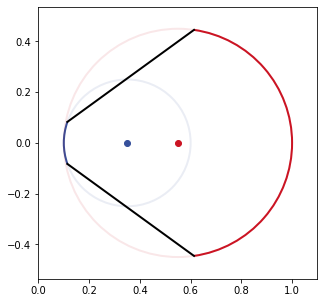

In [3]:
R_embryo, Nb = 1., 5
theta_e = pi/Nb
d = 0.2
Ra = .45
Rb = .25

b = blc.Blastomere(Ra, Rb, d, theta_e, R_embryo)
b.calc_blastomere()

b.plot_blastomere(circles=True, center=True, savefig=False)
plt.show()

# Blastula

Total embryo area =  78.53981633974483
Total blastomere area =  42.71816334903167
Single blastomere area =  2.1359081674515834
Cavity volume =  31.023203640082734


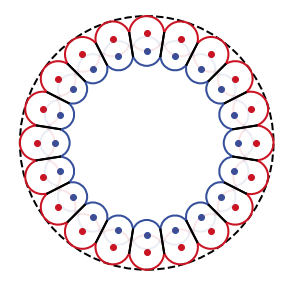

In [4]:
R_embryo, Nb = 5., 20
theta_e = pi/Nb
d=0.7
Ra = R_embryo*np.sin(theta_e)/(1.+np.sin(theta_e))+0.01
Rb = (R_embryo-(Ra+d))*np.sin(theta_e)+0.01

e = blc.Embryo(R_embryo=R_embryo, Nb=Nb)
#print(Ra, Rb)
e.plot_embryo(d=d, Ra=Ra, Rb=Rb, centers=True, circles=True, print_areas=True)



# Interactive blastula

In [5]:
def plot_interactive_RaRbNbdRe(Ra, Rb, Nb, d, Re): 
    
    e = blc.Embryo(R_embryo=Re, Nb=Nb)
    fig = e.plot_embryo(d=d, Ra=Ra, Rb=Rb, centers=False, circles=False, print_areas=True)
    psi_a = calc_psi_ext(Re, Ra, angle=pi/Nb, d=Re-Ra)
    H = Ra+Rb+d
    L = 2*Ra*np.sin(psi_a)
    r = L/H
    
    print('=====================')
    print('Aspect ratio = ', "{:2.4f}".format(r))
    print('Height H = ', "{:2.4f}".format(H))
    print('Cavity area ratio = ', "{:2.3f}".format(e.cavity_area/e.total_area*100), '%')
    print('Lateral contact length = ', "{:2.3f}".format(np.abs(e.blastomere.la-e.blastomere.lb)))
    print()


interactive_plot = interactive(plot_interactive_RaRbNbdRe, Nb=(0, 30), d=(-3.00, 3.), Ra=(0., 1.), Rb=(0., 1.), Re=(0., 5.))
output = interactive_plot.children[-1]
output.layout.height = '500px'

interactive_plot

#interactive_plot.children[-1].outputs[-1]['text']


interactive(children=(FloatSlider(value=0.5, description='Ra', max=1.0), FloatSlider(value=0.5, description='R…

# Illustrative cases

Total embryo area =  3.141592653589793
Total blastomere area =  2.0799032367186037
Single blastomere area =  0.3466505394531006
Cavity volume =  0.7899311957529502


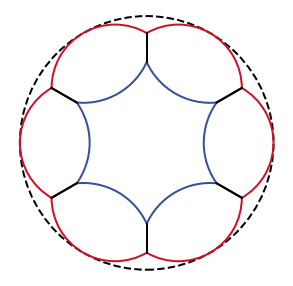

Aspect ratio =  1.5746
Height H =  0.5500

Total embryo area =  2.5446900494077327
Total blastomere area =  2.0714945612378806
Single blastomere area =  0.20714945612378804
Cavity volume =  0.40749147508998135


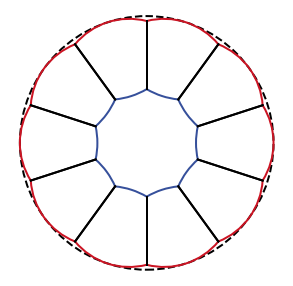

Aspect ratio =  0.9719
Height H =  0.5500

Total embryo area =  2.4884555409084754
Total blastomere area =  2.082723949270834
Single blastomere area =  0.14876599637648816
Cavity volume =  0.3734664760930355


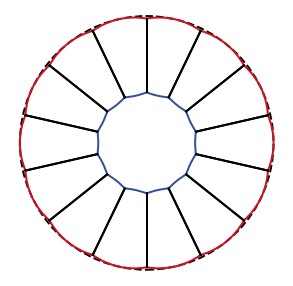

Aspect ratio =  0.7061
Height H =  0.5500

Total embryo area =  4.523893421169302
Total blastomere area =  2.081052880254825
Single blastomere area =  0.2081052880254825
Cavity volume =  2.264355284999234


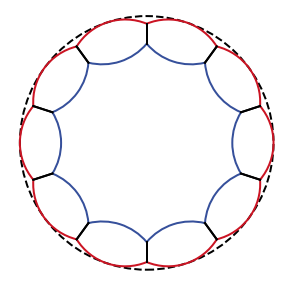

Aspect ratio =  1.7871
Height H =  0.3900

Total embryo area =  2.269800692218625
Total blastomere area =  2.0906486223800456
Single blastomere area =  0.20906486223800455
Cavity volume =  0.0742523542403182


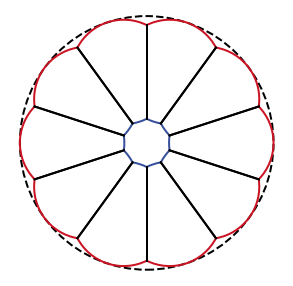

Aspect ratio =  0.6971
Height H =  0.7000



In [6]:
savefig = False

cases = [(1.0, 6, 0.5, 0.55, -0.5), 
         (0.90, 10, 0.5, 0.55, -0.5),
         (0.89, 14, 0.5, 0.55, -0.5),
         (1.20, 10, 0.54, 0.55, -0.70),
         (0.85, 10, 0.35, 0.35, 0.)]
# cases[i] = (Re, Nb, Ra, Rb, d)

for i in range(len(cases)) :
    savename = 'pic'+str(i)+'.eps'
    Re, Nb, Ra, Rb, d = cases[i]
    
    e = blc.Embryo(R_embryo=Re, Nb=Nb)
    e.plot_embryo(d=d, Ra=Ra, Rb=Rb, print_areas=True, savefig=savefig, savename=savename)
    psi_a = calc_psi_ext(Re, Ra, angle=pi/Nb, d=Re-Ra)
    H = Ra+Rb+d
    L = 2*Ra*np.sin(psi_a)
    r = L/H
    
    print('=====================')
    print('Aspect ratio = ', "{:2.4f}".format(r))
    print('Height H = ', "{:2.4f}".format(H))
    print('===============================================================')
    print('===============================================================')
    print()


# Aspect ratio

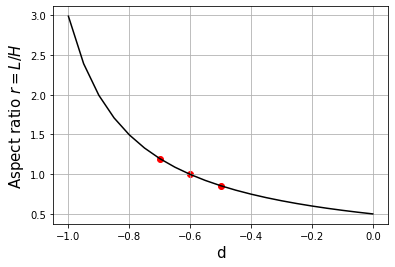

Total embryo area =  3.141592653589793
Total blastomere area =  2.2357341575379324
Single blastomere area =  0.22357341575379325
Cavity volume =  0.8381892361174428


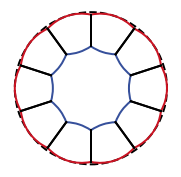

r = 1.19596050151486
H =  0.5
Total embryo area =  3.141592653589793
Total blastomere area =  2.541056710048062
Single blastomere area =  0.2541056710048062
Cavity volume =  0.5328666836073139


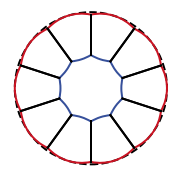

r = 0.9966337512623834
H =  0.6
Total embryo area =  3.141592653589793
Total blastomere area =  2.7761114735591805
Single blastomere area =  0.2776111473559181
Cavity volume =  0.2978119200961936


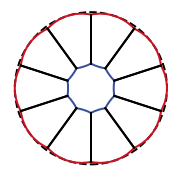

r = 0.8542575010820429
H =  0.7


In [7]:
savefig=False

Re = 1.
Nb = 10

Ra, Rb = .6, .6
d = np.linspace(-1., 0., 21)

psi_a = calc_psi_ext(Re, Ra, angle=pi/Nb, d=Re-Ra)

H = Ra+Rb+d
L = 2*Ra*np.sin(psi_a)
r = L/H
plt.plot(d, r, color='k')
index_list = [6, 8, 10]
for i in index_list :
    plt.scatter(d[i], r[i], color='r')
    
plt.xlabel('d', fontsize=15)
plt.ylabel('Aspect ratio '+r'$r = L/H$', fontsize=15)
plt.grid()

if savefig :
    plt.savefig('aspectratio_VS_d.eps', format='eps')
plt.show()

for i in index_list :
    e = blc.Embryo(R_embryo=Re, Nb=Nb)
    e.plot_embryo(d=d[i], Ra=Ra, Rb=Rb, savefig=savefig, savename='pic_d'+"{:2.2f}".format(d[i])+'_r'+"{:2.2f}".format(r[i])+'.eps', figsize=(3,3), print_areas=True)
    print('r =', r[i])
    print('H = ', H[i])
    print('========================================')
    print('========================================')
    

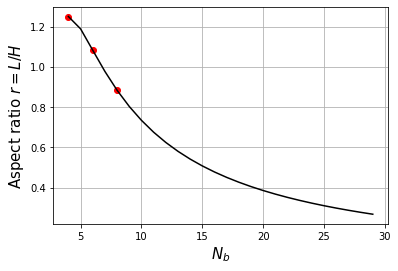

Total embryo area =  3.141592653589793
Total blastomere area =  2.374297435588181
Single blastomere area =  0.5935743588970452
Cavity volume =  0.19649889120671543


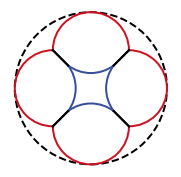

r= 1.25
Total embryo area =  3.141592653589793
Total blastomere area =  2.7243251554241104
Single blastomere area =  0.4540541925706851
Cavity volume =  0.14550927704744418


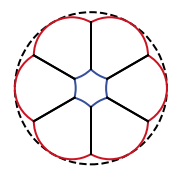

r= 1.082531754730548
Total embryo area =  3.141592653589793
Total blastomere area =  2.849246459261881
Single blastomere area =  0.3561558074077351
Cavity volume =  0.13576342990610998


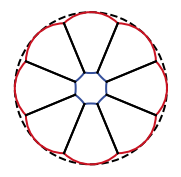

r= 0.8838834764831844


In [8]:
savefig = False

Re = 1.

d=-0.2
Ra, Rb = 0.5, 0.5

Nb_list = np.arange(4, 30)

psi_a = np.array([calc_psi_ext(Re, Ra, angle=pi/Nb_list[i], d=Re-Ra) for i in range(len(Nb_list))])

H = Ra+Rb+d
L = 2*Ra*np.sin(psi_a)
r = L/H

plt.plot(Nb_list, r, color='k')

index_list = [0, 2, 4]
for i in index_list :
    plt.scatter(Nb_list[i], r[i], color='r')

plt.xlabel(r'$N_b$', fontsize=15)
plt.ylabel('Aspect ratio '+r'$r = L/H$', fontsize=15)

plt.grid()
if savefig :
    plt.savefig('aspectratio_VS_Nb.eps', format='eps')
plt.show()

for i in index_list :
    e = blc.Embryo(R_embryo=Re, Nb=Nb_list[i])
    e.plot_embryo(d=d, Ra=Ra, Rb=Rb, savefig=savefig, savename='pic_Nb'+"{:2.2f}".format(Nb_list[i])+'_r'+"{:2.2f}".format(r[i])+'.eps', figsize=(3,3), print_areas=True)
    print('r=', r[i])
    

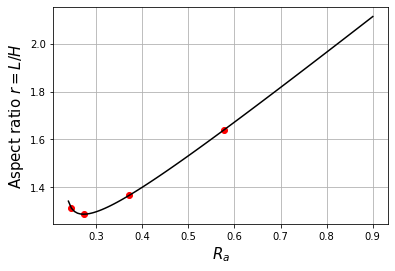

Total embryo area =  3.141592653589793
Total blastomere area =  2.3798122115098845
Single blastomere area =  0.23798122115098846
Cavity volume =  0.4195971749453197


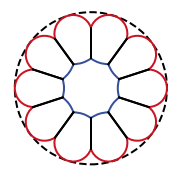

Total embryo area =  3.141592653589793
Total blastomere area =  2.497971809481414
Single blastomere area =  0.2497971809481414
Cavity volume =  0.3582751802437655


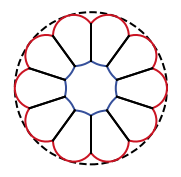

Total embryo area =  3.141592653589793
Total blastomere area =  2.7966980693150227
Single blastomere area =  0.2796698069315023
Cavity volume =  0.17247782805414516


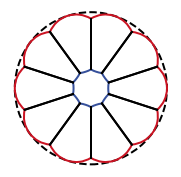

Total embryo area =  3.141592653589793
Total blastomere area =  3.0653205094398173
Single blastomere area =  0.3065320509439817
Cavity volume =  0.001782810202990847


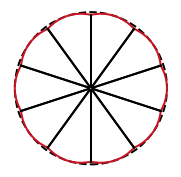

In [9]:
savefig = False

Re = 1.

Nb = 10

Rb = .4
d = 0.

Ra = np.linspace(0.24, .9, 101)
psi_a = np.array([calc_psi_ext(Re, Ra[i], angle=pi/Nb, d=Re-Ra[i]) for i in range(len(Ra))])

Lh = Ra+Rb+d
Lv = 2*Ra*np.sin(psi_a)
r = Lh/Lv

plt.plot(Ra, Lh/Lv, color='k')
index_list = [1, 5, 20, 51]
for i in index_list :
    plt.scatter(Ra[i], r[i], color='r')

plt.xlabel(r'$R_a$', fontsize=15)
plt.ylabel('Aspect ratio '+r'$r = L/H$', fontsize=15)

plt.grid()
if savefig :
    plt.savefig('aspectratio_VS_Ra.eps', format='eps')
plt.show()

for i in index_list :
    e = blc.Embryo(R_embryo=Re, Nb=Nb)
    e.plot_embryo(d=d, Ra=Ra[i], Rb=Rb, print_areas=True, savefig=savefig, savename='pic_Ra'+"{:2.2f}".format(Ra[i])+'_r'+"{:2.2f}".format(r[i])+'.eps', figsize=(3,3))



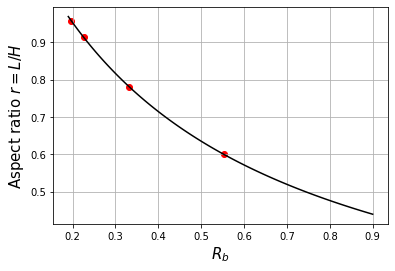

Total embryo area =  3.141592653589793
Total blastomere area =  2.4086598596617135
Single blastomere area =  0.24086598596617134
Cavity volume =  0.5803158443638375


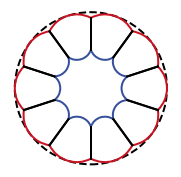

Total embryo area =  3.141592653589793
Total blastomere area =  2.500038568203691
Single blastomere area =  0.25000385682036913
Cavity volume =  0.4889371358218588


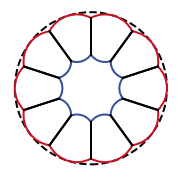

Total embryo area =  3.141592653589793
Total blastomere area =  2.748423572450532
Single blastomere area =  0.27484235724505324
Cavity volume =  0.24055213157501837


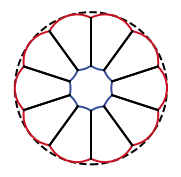

Total embryo area =  3.141592653589793
Total blastomere area =  2.981497792211754
Single blastomere area =  0.2981497792211754
Cavity volume =  0.007477911813796975


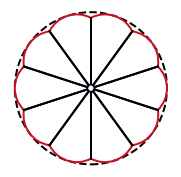

In [10]:
savefig = False

Re = 1.

Nb = 10

Ra = .4
d = 0.

Rb = np.linspace(0.19, .9, 101)
psi_a = calc_psi_ext(Re, Ra, angle=pi/Nb, d=Re-Ra)

H = Ra+Rb+d
L = 2*Ra*np.sin(psi_a)
r = L/H

plt.plot(Rb, r, color='k')
index_list = [1, 5, 20, 51]
for i in index_list :
    plt.scatter(Rb[i], r[i], color='r')

plt.xlabel(r'$R_b$', fontsize=15)
plt.ylabel('Aspect ratio '+r'$r = L/H$', fontsize=15)

plt.grid()
if savefig :
    plt.savefig('aspectratio_VS_Rb.eps', format='eps')
plt.show()

for i in index_list :
    e = blc.Embryo(R_embryo=Re, Nb=Nb)
    e.plot_embryo(d=d, Ra=Ra, Rb=Rb[i], print_areas=True, savefig=savefig, savename='pic_Rb'+"{:2.2f}".format(Rb[i])+'_r'+"{:2.2f}".format(r[i])+'.eps', figsize=(3,3))




[0.65  0.645 0.64  0.635 0.63  0.625 0.62  0.615 0.61  0.605 0.6   0.595
 0.59  0.585 0.58  0.575 0.57  0.565 0.56  0.555 0.55  0.545 0.54  0.535
 0.53  0.525 0.52  0.515 0.51  0.505 0.5   0.495 0.49  0.485 0.48  0.475
 0.47  0.465 0.46  0.455 0.45  0.445 0.44  0.435 0.43  0.425 0.42  0.415
 0.41  0.405 0.4   0.395 0.39  0.385 0.38  0.375 0.37  0.365 0.36  0.355
 0.35  0.345 0.34  0.335 0.33  0.325 0.32  0.315 0.31  0.305 0.3   0.295
 0.29  0.285 0.28  0.275 0.27  0.265 0.26  0.255 0.25  0.245 0.24  0.235
 0.23  0.225 0.22  0.215 0.21  0.205 0.2   0.195 0.19  0.185 0.18  0.175
 0.17  0.165 0.16  0.155 0.15 ]


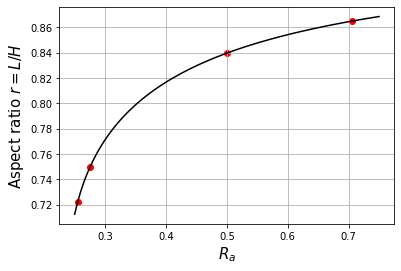

Total embryo area =  3.141592653589793
Total blastomere area =  2.5228496922090624
Single blastomere area =  0.25228496922090626
Cavity volume =  0.2974184033757465


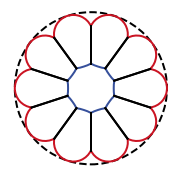

Cell area =  2.5228496922090624
Cavity area =  0.2974184033757465
Total embryo area =  3.141592653589793
Total blastomere area =  2.5621391838171634
Single blastomere area =  0.25621391838171637
Cavity volume =  0.29758592491873104


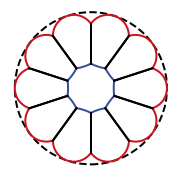

Cell area =  2.5621391838171634
Cavity area =  0.29758592491873104
Total embryo area =  3.141592653589793
Total blastomere area =  2.739528185614415
Single blastomere area =  0.2739528185614415
Cavity volume =  0.300731271911664


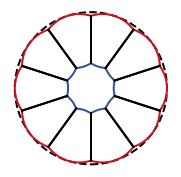

Cell area =  2.739528185614415
Cavity area =  0.300731271911664
Total embryo area =  3.141592653589793
Total blastomere area =  2.7873036246514786
Single blastomere area =  0.2787303624651479
Cavity volume =  0.3116718610126307


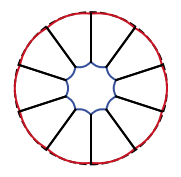

Cell area =  2.7873036246514786
Cavity area =  0.3116718610126307


In [11]:
savefig = False

Re = 1.

Nb = 10

d = -0.2
Ra_init = 0.25
Ra_end = 0.75 

length = .7

Ra = np.linspace(Ra_init, Ra_end, 101)
Rb = length - Ra - d
print(Rb)
psi_a = np.array([calc_psi_ext(Re, Ra[i], angle=pi/Nb, d=Re-Ra[i]) for i in range(len(Ra))])

H = Ra+Rb+d
L = 2*Ra*np.sin(psi_a)
r = L/H

plt.plot(Ra, r, color='k')
index_list = [1, 5, 50, 91]
for i in index_list :
    plt.scatter(Ra[i], r[i], color='r')

plt.xlabel(r'$R_a$', fontsize=15)
plt.ylabel('Aspect ratio '+r'$r = L/H$', fontsize=15)

plt.grid()
if savefig :
    plt.savefig('aspectratio_VS_Ra.eps', format='eps')
plt.show()

for i in index_list :
    e = blc.Embryo(R_embryo=Re, Nb=Nb)
    e.plot_embryo(d=d, Ra=Ra[i], Rb=Rb[i], print_areas=True, savefig=savefig, savename='pic_Ra'+"{:2.2f}".format(Ra[i])+'_r'+"{:2.2f}".format(r[i])+'.eps', figsize=(3,3))
    print('Cell area = ', e.cell_area)
    print('Cavity area = ', e.cavity_area)
    print('================================')

